**Klasifikasi Diabetes Tipe 2 Berbasis Faktor Klinis dan Gaya Hidup: Optimalisasi Kinerja Menggunakan Algoritma Random Forest dan Teknik SMOTE** <br>
Project: Diabetes Prediction <br>
Nama: Rizky Nanda Anggia <br>
NIM: 22.11.4825 <br>
Kelas: 22S1IF-ProyekD4(ST167)

**Judul Penelitian** <br>
Klasifikasi Diabetes Tipe 2 Berbasis Faktor Klinis dan Gaya Hidup: Optimalisasi Kinerja Menggunakan Algoritma Random Forest dan Teknik SMOTE

# **Library**

In [ ]:
# 1. Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle  # untuk menyimpan dan memuat model

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# **Load Dataset**

In [ ]:
# 2. Load Dataset
df = pd.read_csv("/content/diabetes_data.csv")

# **Preprocessing dan EDA**

In [ ]:
# 3. Cek Missing Value
missing = df.isnull().sum()
print("Missing Values:\n", missing[missing > 0])

Missing Values:
 Series([], dtype: int64)


In [ ]:
# 4. Tangani Missing Value
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

In [ ]:
# 5. Drop Kolom Tidak Relevan
columns_to_drop = ['PatientID', 'DoctorInCharge']
existing_cols = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=existing_cols, inplace=True)

In [ ]:
# 7. Pisahkan fitur dan target
selected_features = [
    'FastingBloodSugar', 'HbA1c', 'SleepQuality', 'CholesterolHDL',
    'FatigueLevels', 'CholesterolLDL', 'MedicationAdherence',
    'QualityOfLifeScore', 'DiastolicBP', 'Age'
]
X = df[selected_features]
y = df['Diagnosis']

In [ ]:
# 8. Normalisasi Fitur Numerik
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

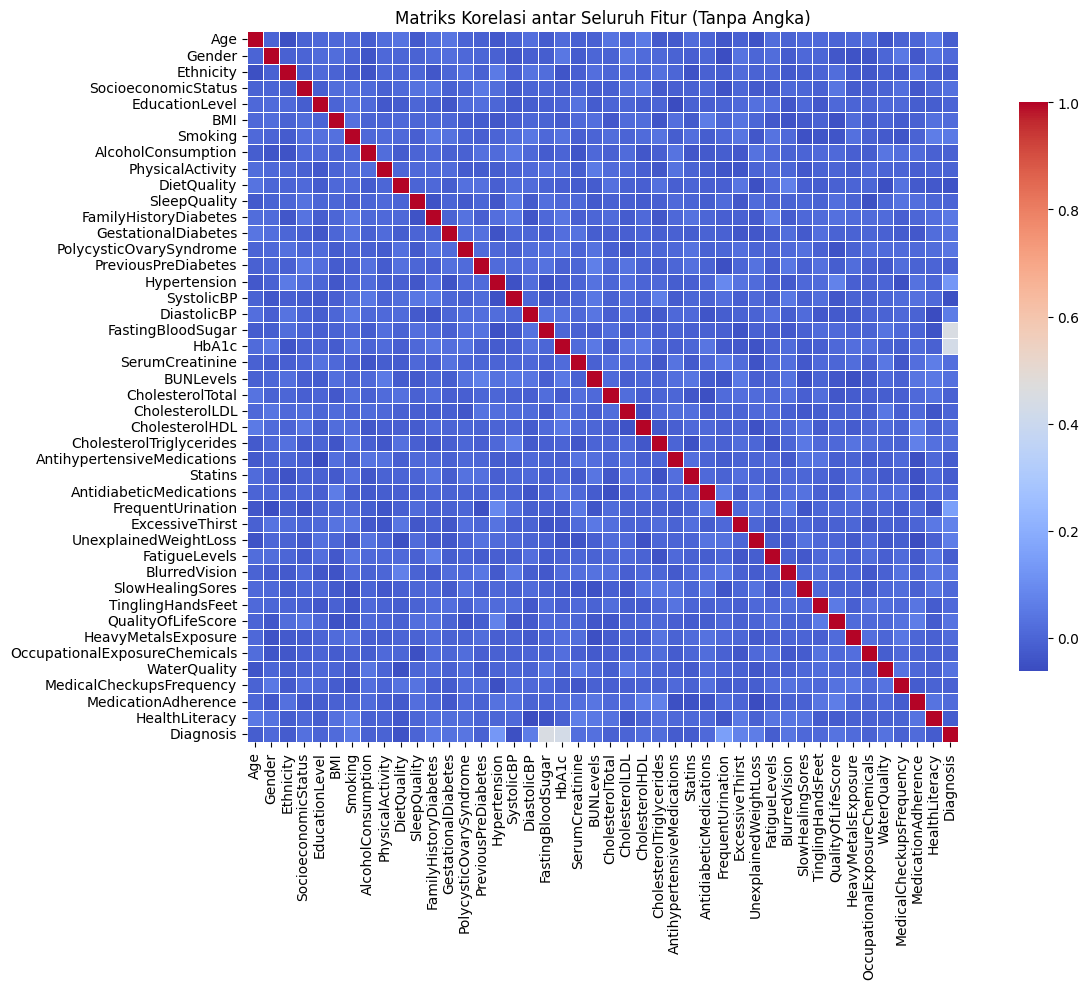

In [ ]:
# 9. EDA - Heatmap Korelasi (Teradaptasi)
df_corr = df.copy()

# Encoding kolom kategorikal (untuk korelasi)
for col in df_corr.select_dtypes(include='object').columns:
    df_corr[col] = LabelEncoder().fit_transform(df_corr[col])

# Matriks Korelasi
correlation_matrix = df_corr.corr()

# Heatmap antar semua fitur (tanpa angka)
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix,
            annot=False,
            cmap='coolwarm',
            linewidths=0.5,
            square=True,
            cbar_kws={"shrink": 0.8})
plt.title("Matriks Korelasi antar Seluruh Fitur (Tanpa Angka)")
plt.tight_layout()
plt.show()

In [ ]:
# 10. SMOTE untuk Penyeimbangan Data
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

/tmp/ipython-input-10-2188375623.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='pastel')
/tmp/ipython-input-10-2188375623.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_res, palette='pastel')


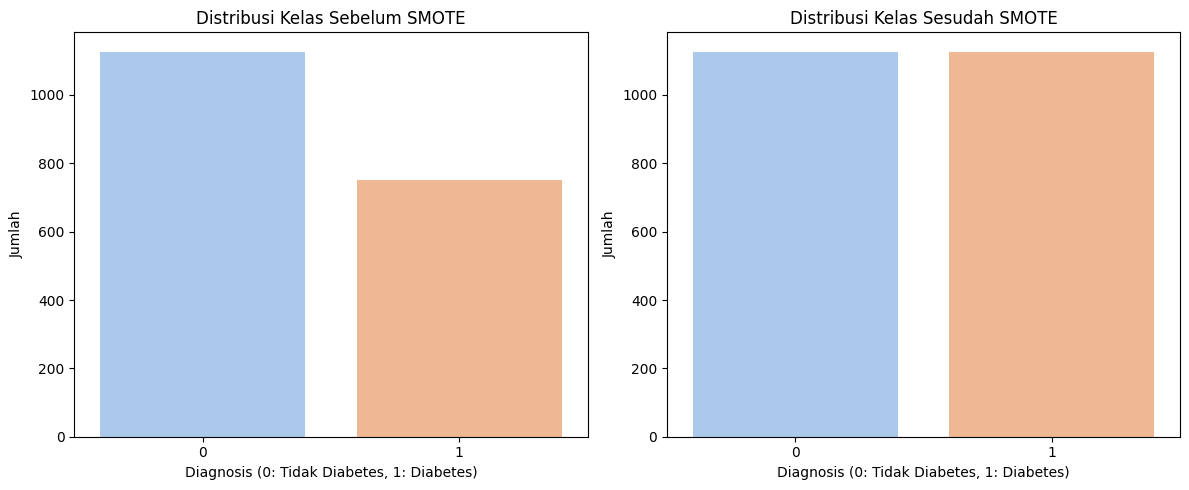


Distribusi kelas sebelum SMOTE:
Diagnosis
0    1127
1     752
Name: count, dtype: int64

Distribusi kelas sesudah SMOTE:
Diagnosis
1    1127
0    1127
Name: count, dtype: int64


In [ ]:
# LANGKAH TAMBAHAN: VISUALISASI SETELAH SMOTE
# -------------------------------------------

# 1. Membandingkan distribusi kelas sebelum dan sesudah SMOTE
plt.figure(figsize=(12, 5))

# Plot sebelum SMOTE
plt.subplot(1, 2, 1)
sns.countplot(x=y, palette='pastel')
plt.title('Distribusi Kelas Sebelum SMOTE')
plt.xlabel('Diagnosis (0: Tidak Diabetes, 1: Diabetes)')
plt.ylabel('Jumlah')

# Plot sesudah SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_res, palette='pastel')
plt.title('Distribusi Kelas Sesudah SMOTE')
plt.xlabel('Diagnosis (0: Tidak Diabetes, 1: Diabetes)')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

print("\nDistribusi kelas sebelum SMOTE:")
print(y.value_counts())
print("\nDistribusi kelas sesudah SMOTE:")
print(y_res.value_counts())

# **Split Data**

In [ ]:
# 11. Split Data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [ ]:
# 12. Fit Awal Random Forest (seluruh fitur)
rf_full = RandomForestClassifier(random_state=42)
rf_full.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# **Feature Selection**

In [ ]:
# 13. Feature Selection - Ambil 10 fitur terpenting
feature_importances = pd.Series(rf_full.feature_importances_, index=X.columns)
top_10_features = feature_importances.sort_values(ascending=False).head(10).index.tolist()

print("Top 10 Fitur Terpenting:\n", top_10_features)

Top 10 Fitur Terpenting:
 ['FastingBloodSugar', 'HbA1c', 'QualityOfLifeScore', 'FatigueLevels', 'MedicationAdherence', 'SleepQuality', 'CholesterolHDL', 'DiastolicBP', 'CholesterolLDL', 'Age']


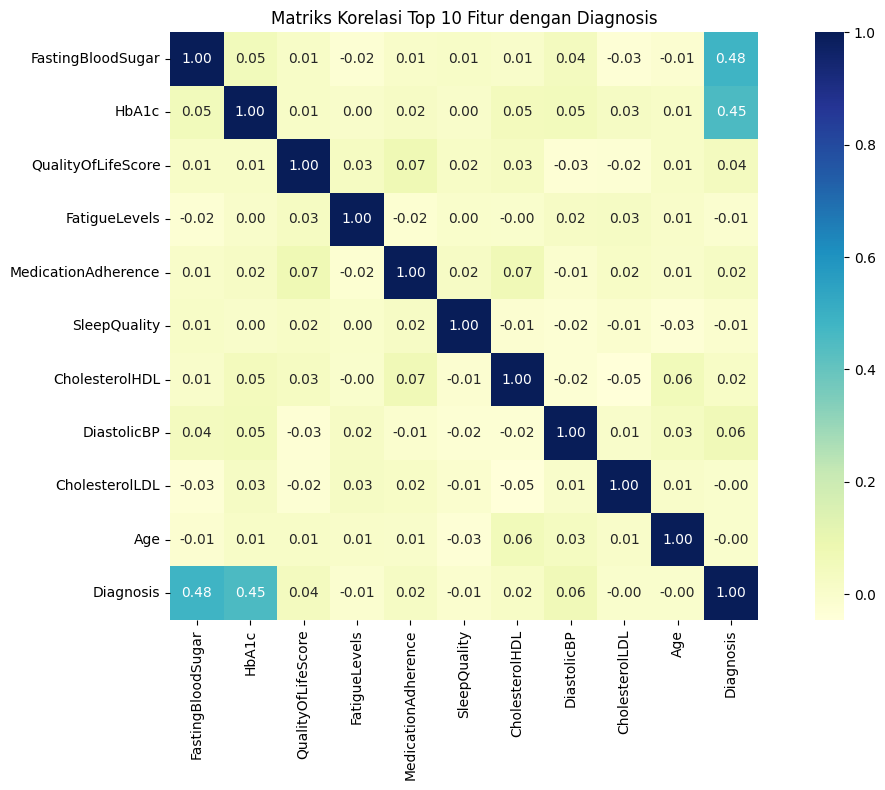

In [ ]:
# 14. Korelasi Matriks Khusus Top 10 Fitur
df_top10 = pd.DataFrame(X_res[top_10_features])
df_top10['Diagnosis'] = y_res  # gabungkan target untuk korelasi dengan diagnosis

plt.figure(figsize=(12, 8))
sns.heatmap(df_top10.corr(), annot=True, cmap='YlGnBu', fmt='.2f', square=True)
plt.title("Matriks Korelasi Top 10 Fitur dengan Diagnosis")
plt.tight_layout()
plt.show()

In [ ]:
# 14. Re-split data hanya dengan 10 fitur terbaik
X_top10 = X_res[top_10_features]
X_train, X_test, y_train, y_test = train_test_split(X_top10, y_res, test_size=0.2, random_state=42)

# **Modelling**

In [ ]:
# 15. Optimasi dan Training Final Model
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=1,
                           scoring='accuracy')

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


In [ ]:
# LANGKAH TAMBAHAN: VALIDASI SILANG (CROSS-VALIDATION)
# ----------------------------------------------------
from sklearn.model_selection import cross_val_score

# best_model didapatkan dari cell #15 (GridSearchCV)
# X_train dan y_train adalah data latih Anda dari cell #14

# Lakukan 5-fold cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

print("Hasil Akurasi dari 5-Fold Cross-Validation:")
print(cv_scores)
print("\n==============================================")
print(f"Rata-rata Akurasi: {cv_scores.mean():.4f}")
print(f"Standar Deviasi Akurasi: {cv_scores.std():.4f}")

Hasil Akurasi dari 5-Fold Cross-Validation:
[0.90858726 0.88088643 0.91135734 0.89722222 0.90555556]

Rata-rata Akurasi: 0.9007
Standar Deviasi Akurasi: 0.0110


# **Evaluasi Model**

In [ ]:
# 16. Evaluasi Model
y_pred = best_model.predict(X_test)
print("\nBest Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8980044345898004

Confusion Matrix:
 [[206  12]
 [ 34 199]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       218
           1       0.94      0.85      0.90       233

    accuracy                           0.90       451
   macro avg       0.90      0.90      0.90       451
weighted avg       0.90      0.90      0.90       451



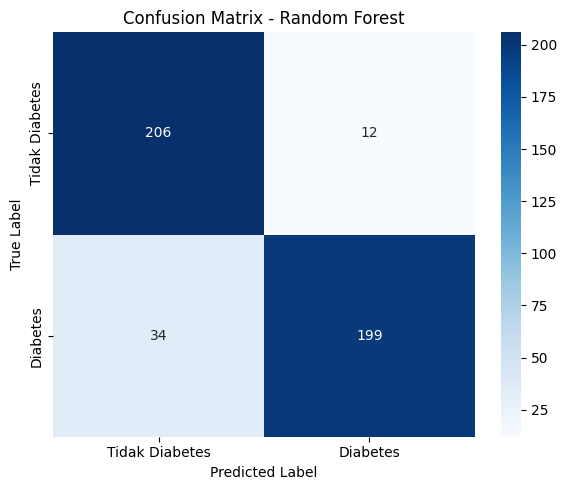

In [ ]:
# 17. Visualisasi Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Tidak Diabetes', 'Diabetes']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


# **Menyimpan Model**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path tujuan penyimpanan di Google Drive
model_path = "/content/drive/MyDrive/random_forest_model.pkl"

# Simpan model ke file .pkl di Google Drive
with open(model_path, "wb") as file:
    pickle.dump(best_model, file)

print(f"✅ Model berhasil disimpan di Google Drive: {model_path}")

# --- Tambahan: Simpan objek scaler untuk digunakan di aplikasi Flask ---
scaler_path = "/content/drive/MyDrive/scaler.pkl" # Pastikan path ini sesuai dengan tempat Anda ingin menyimpan scaler
with open(scaler_path, "wb") as file:
    pickle.dump(scaler, file)
print(f"✅ Scaler berhasil disimpan di Google Drive: {scaler_path}")

✅ Model berhasil disimpan di Google Drive: /content/drive/MyDrive/random_forest_model.pkl
✅ Scaler berhasil disimpan di Google Drive: /content/drive/MyDrive/scaler.pkl


In [ ]:
# Load ulang model dari Google Drive
with open(model_path, "rb") as file:
    loaded_model = pickle.load(file)

print("✅ Model berhasil dimuat ulang dari Google Drive!")

# Contoh prediksi ulang
y_pred_loaded = loaded_model.predict(X_test)

✅ Model berhasil dimuat ulang dari Google Drive!


In [ ]:
# Contoh prediksi ulang
y_loaded_pred = loaded_model.predict(X_test)

# Evaluasi hasil prediksi dari model yang dimuat ulang
from sklearn.metrics import accuracy_score
print("Akurasi model yang dimuat ulang:", accuracy_score(y_test, y_loaded_pred))

Akurasi model yang dimuat ulang: 0.8980044345898004
